<a href="https://colab.research.google.com/github/16ajoop/Elevate_lab_intern/blob/main/Student_MentalHealth_%26_Academic_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Mental Health and Academic Performance**



| Column Name        | Type        | Description                 |
| ------------------ | ----------- | --------------------------- |
| `Student_ID`       | Categorical | Unique ID                   |
| `Age`              | Numerical   | Age of the student          |
| `Gender`           | Categorical | Male, Female, Other         |
| `Hours_Studied`    | Numerical   | Avg hours per day           |
| `Sleep_Hours`      | Numerical   | Avg sleep in hours          |
| `Stress_Level`     | Categorical | Low, Medium, High           |
| `Exam_Score`       | Numerical   | Score out of 100            |
| `Part_of_Clubs`    | Categorical | Yes, No                     |
| `Therapy_Seeking`  | Categorical | Yes, No                     |
| `Depression_Score` | Numerical   | Scale 0-10 (higher = worse) |


# 🔧 Step 1: Import Libraries and Load Dataset
bold text

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("student_mental_health.csv")
print(df.head())

  Student_ID  Age Gender  Hours_Studied  Sleep_Hours Stress_Level  Exam_Score  \
0       S001   24   Male            3.5          6.5         High        69.9   
1       S002   21  Other            0.4          6.3       Medium        46.4   
2       S003   22  Other            3.5          5.1          Low        92.2   
3       S004   24   Male            2.4          6.1         High        76.0   
4       S005   20   Male            2.0          6.2          Low        43.3   

  Part_of_Clubs Therapy_Seeking  Depression_Score  
0            No              No               4.7  
1           Yes              No               5.9  
2            No             Yes               5.2  
3            No             Yes               6.1  
4            No              No               1.9  


# 📊 Step 2: Explore Basic Info

In [ ]:
print("Shape:", df.shape) #Helps you understand how big the dataset is.
                          #Returns a tuple like (rows, columns)

Shape: (50, 10)


In [ ]:
print(df.info())  #Shows column names, non-null values, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        50 non-null     object 
 1   Age               50 non-null     int64  
 2   Gender            47 non-null     object 
 3   Hours_Studied     47 non-null     float64
 4   Sleep_Hours       47 non-null     float64
 5   Stress_Level      50 non-null     object 
 6   Exam_Score        50 non-null     float64
 7   Part_of_Clubs     50 non-null     object 
 8   Therapy_Seeking   50 non-null     object 
 9   Depression_Score  50 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 4.0+ KB
None


In [ ]:
print(df.describe())  #Gives summary statistics of all numerical columns
                      #count, mean, std (standard deviation), min, max, quartiles

             Age  Hours_Studied  Sleep_Hours  Exam_Score  Depression_Score
count  50.000000      47.000000    47.000000   50.000000         50.000000
mean   21.280000       2.919149     6.382979   66.758000          3.994000
std     1.852081       1.336712     0.962632   15.725023          2.114904
min    18.000000      -0.900000     4.600000   41.800000          0.000000
25%    20.000000       2.200000     5.600000   54.900000          2.225000
50%    21.000000       3.100000     6.500000   67.050000          4.400000
75%    23.000000       3.650000     6.850000   76.225000          5.575000
max    24.000000       5.300000     8.700000  101.800000          7.700000


In [ ]:
print(df.isnull().sum())  #Counts how many missing values are in each column.

Student_ID          0
Age                 0
Gender              3
Hours_Studied       3
Sleep_Hours         3
Stress_Level        0
Exam_Score          0
Part_of_Clubs       0
Therapy_Seeking     0
Depression_Score    0
dtype: int64


# 🛠️Step 3: Handle Missing Values

In [34]:
df['Hours_Studied'].fillna(df['Hours_Studied'].mean())
#Replaces all NaN values in the Hours_Studied column with the average value.
#Method: mean()
#When to Use? Data is roughly normal (no outliers)

,Hours_Studied
0,3.500000
1,0.400000
2,3.500000
3,2.400000
4,2.000000
5,3.900000
6,4.500000
7,4.400000
8,1.700000
9,2.500000


In [ ]:
df['Sleep_Hours'].fillna(df['Sleep_Hours'].median())
#Method: median()
#When to Use? Data has outliers or is skewed

,Sleep_Hours
0,6.5
1,6.3
2,5.1
3,6.1
4,6.2
5,5.7
6,6.3
7,6.9
8,8.4
9,6.7


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0])
# Data Type :  Categorical
# Method: mode()[0]
# mode() returns a Series, so we select the first value using [0].
# When to Use? Filling with most common category.

,Gender
0,Male
1,Other
2,Other
3,Male
4,Male
5,Other
6,Female
7,Male
8,Female
9,Female


# 🔁 Step 4: Encode Categorical Columns



In [ ]:
# Binary Encoding
df['Part_of_Clubs'] = df['Part_of_Clubs'].map({'Yes': 1, 'No': 0})
df['Therapy_Seeking'] = df['Therapy_Seeking'].map({'Yes': 1, 'No': 0})
# map() replaces "Yes" with 1 and "No" with 0

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Stress_Level'], drop_first=True)
# Means:
# - Apply "one-hot encoding" to the 'Gender' column in the DataFrame `df`
# - "Create new columns" for each gender except the first (alphabetically or in appearance)
# - "Return a new DataFrame" with 0s and 1s representing gender categories

# 📏 Step 5: Normalize/Standardize Numerical Features

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'Hours_Studied', 'Sleep_Hours', 'Exam_Score', 'Depression_Score']
df[num_cols] = scaler.fit_transform(df[num_cols])

# 📦 Step 6: Visualize and Remove Outliers (Boxplot + IQR)

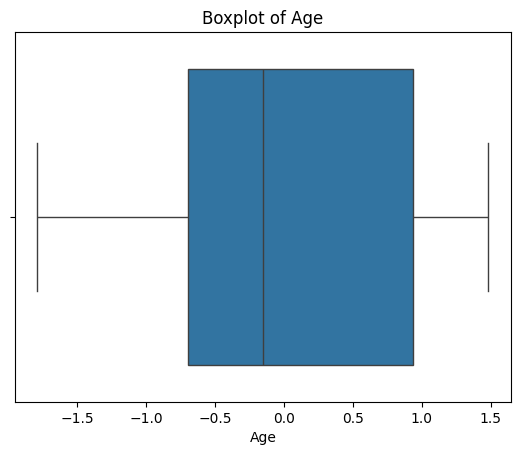

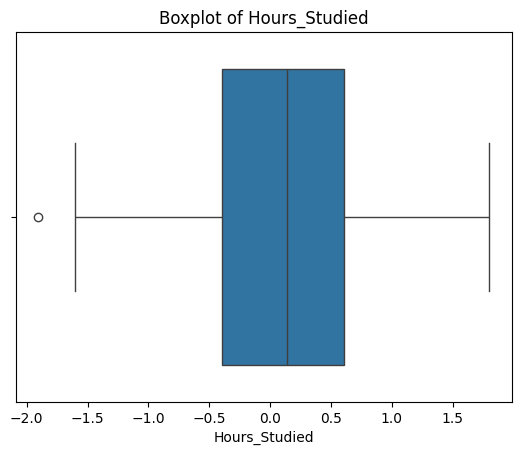

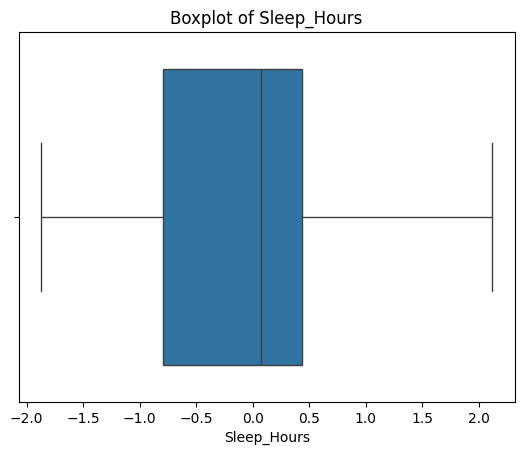

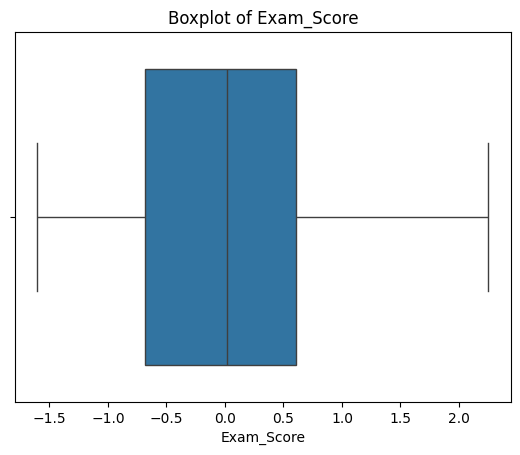

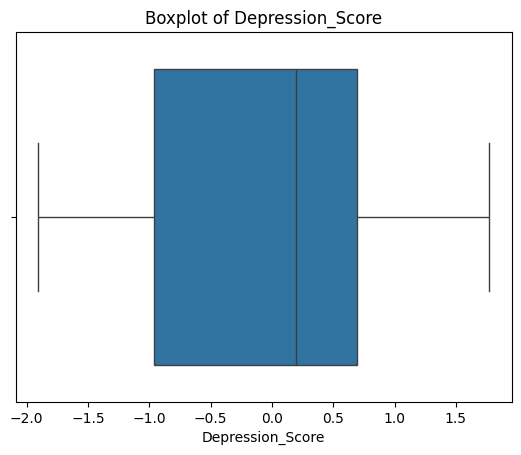

In [39]:
# Boxplots
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



#    Diagram exlaination:

# |———•=====|=====•———|
#   ^   ^   ^   ^   ^
#   |   |   |   |   +-- Max value (could be outlier)
#   |   |   |   +------ Q3 (upper quartile)
#   |   |   +---------- Median
#   |   +-------------- Q1 (lower quartile)
#   +------------------ Min value


#-The box contains the middle 50% of the data.
#-The line inside the box is the median.
#-The dots outside whiskers are outliers.

Diagram exlaination:

|———•=====|=====•———|
  ^   ^   ^   ^   ^
  |   |   |   |   +-- Max value (could be outlier)
  |   |   |   +------ Q3 (upper quartile)
  |   |   +---------- Median
  |   +-------------- Q1 (lower quartile)
  +------------------ Min value


In [37]:
# Outlier removal using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# ✅ Step 7: Final Check

In [38]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 49
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        42 non-null     object 
 1   Age               42 non-null     float64
 2   Gender            40 non-null     object 
 3   Hours_Studied     42 non-null     float64
 4   Sleep_Hours       42 non-null     float64
 5   Stress_Level      42 non-null     object 
 6   Exam_Score        42 non-null     float64
 7   Part_of_Clubs     42 non-null     object 
 8   Therapy_Seeking   42 non-null     object 
 9   Depression_Score  42 non-null     float64
dtypes: float64(5), object(5)
memory usage: 3.6+ KB
None
  Student_ID       Age Gender  Hours_Studied  Sleep_Hours Stress_Level  \
0       S001  1.483528   Male       0.439235     0.122878         High   
1       S002 -0.152716  Other      -1.904961    -0.087132       Medium   
2       S003  0.392699  Other       0.439235    -1.347191  